In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha
import os
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
# load labels
labels=pd.read_csv('labels.csv',names=['age','gender','race']) # gender 0 male, 1 female (Races from 0 to 4)
labels.head()

,age,gender,race
0,100,0,0
1,100,0,0
2,100,1,0
3,100,1,0
4,100,1,0


In [5]:
data_paths = os.listdir('Faces')
n=len(data_paths)
p=200*200 # we add the label as the first element
X=np.zeros([n,p])
race=np.zeros(n)
gender=np.zeros(n)
age=np.zeros(n)
print(f'number of observations: {n}, number of features: {p}')
# load images
for idx,el in enumerate(data_paths):
    img=plt.imread('Faces/'+el)
    img_gray=rgb2gray(img)
    img_gray_norm=img_gray/255.0
    flatten=img_gray_norm.flatten()
    # get the label
    race[idx]=labels.iloc[int(el[:-4]),2]
    gender[idx]=labels.iloc[int(el[:-4]),1]
    age[idx]=labels.iloc[int(el[:-4]),0]
    # hstack label (as the first element) and pixels
    # features=np.hstack((race,flatten))
    X[idx]=flatten

number of observations: 23705, number of features: 40000


In [6]:
X.shape

(23705, 40000)

In [7]:
mean_img=np.mean(X,axis=0)

In [8]:
mean_img.shape

(40000,)

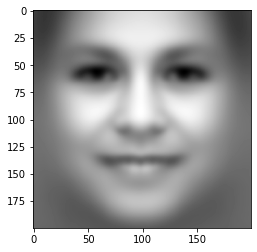

In [9]:
plt.imshow(mean_img.reshape(200,200),cmap='gray');plt.show()

In [10]:
X[1]-mean_img

array([ 0.27544425,  0.23908982,  0.15201193, ..., -0.19937395,
       -0.21138591, -0.21957808])

### Substract mean to perform PCA

In [11]:
X_non_mean=np.array([img-mean_img for img in X])
X_non_mean.shape

(23705, 40000)

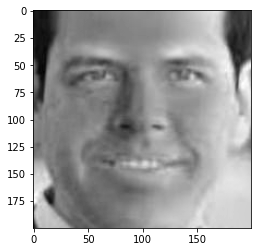

In [12]:
plt.imshow(X_non_mean[0].reshape(200,200),cmap='gray');plt.show()

### Filtering for ages

In [28]:
age

array([29., 36., 10., ..., 26., 18., 35.])

In [57]:
age_groups

[(25.0, 50.0], (25.0, 50.0], (0.0, 25.0], (25.0, 50.0], (25.0, 50.0], ..., (25.0, 50.0], (25.0, 50.0], (25.0, 50.0], (0.0, 25.0], (25.0, 50.0]]
Length: 23705
Categories (4, interval[float64, right]): [(0.0, 25.0] < (25.0, 50.0] < (50.0, 75.0] < (75.0, inf]]

In [59]:
age_groups = pd.cut(age, bins=[0,10,30,50,75, np.inf],labels=[1,2,3,4,5])

### Let's take 2nd category (label==2), 10-30 years

In [64]:
age2=X_non_mean[age_groups==2]

In [65]:
age2.shape

(9443, 40000)

In [66]:
sum(age_groups==2)

9443

### We do PCA of the whole dataset

In [69]:
from sklearn.decomposition import PCA
import ttictoc as t

In [71]:
t.tic()
pca = PCA(n_components=100)
pca_scores=pca.fit_transform(X_non_mean)
print('Time:',t.toc())
pca_scores.shape

Time: 490.45339945900014


(23705, 100)

In [74]:
Scores=pd.DataFrame(pca_scores)
Scores

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,21.243497,12.882547,-12.462138,8.476975,0.124095,-4.678514,-4.782072,-8.882025,3.423989,-2.322195,...,-0.485693,-0.028816,-0.995708,1.308205,-1.746310,-0.717457,0.172843,0.124768,-1.181707,-0.142586
1,-11.263357,-12.444928,-30.401853,2.556189,0.520694,7.495769,-5.131975,-4.197540,2.991335,1.407665,...,-0.343807,1.493297,-0.684062,-1.748511,0.392755,-0.644750,-0.453683,-0.263134,0.864442,-0.028801
2,-6.856014,-13.873432,10.234697,-15.139973,-4.761215,2.868388,9.607138,-8.316808,-4.196192,0.349312,...,0.252578,-0.457762,0.522302,0.190310,1.586926,-0.610088,-0.719979,-1.986052,0.060687,0.100675
3,23.590310,1.139462,-8.016764,-0.013906,-19.334585,-7.329841,0.010987,-4.138288,2.010781,-8.638893,...,0.061513,2.352694,1.352354,1.455921,2.813175,-0.403845,1.121947,-1.893903,0.389006,0.318029
4,-22.865609,25.927961,-21.179880,1.621765,-2.239727,8.477692,-3.056035,-7.722793,6.881799,-3.700191,...,-0.015298,1.916620,-0.053112,-0.961421,-0.460779,1.289702,0.913013,0.352844,0.326157,0.202636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23700,-5.329966,-15.449911,-25.881027,12.832682,23.580701,-19.126022,9.347827,1.554653,3.962509,8.690264,...,0.797626,-1.475714,-2.243511,-1.035509,0.736851,-1.838750,-0.446943,-2.329037,-1.466376,1.869948
23701,16.130735,4.701462,-5.300468,0.421038,-5.882530,-0.593691,15.482980,2.318405,6.342095,-7.432518,...,-0.186841,1.771709,0.480606,-3.763590,-1.347249,-2.540308,-0.995597,0.618091,-0.051718,0.700928
23702,2.198586,-9.805288,-7.661179,-7.181702,-6.190898,-10.533385,6.570830,-5.118873,-3.670963,-12.107613,...,-1.993567,-0.457093,0.847086,0.239898,2.309011,0.375992,1.164812,0.428567,0.562820,0.048437
23703,33.800039,-12.204152,-25.356018,-23.936102,-19.268471,10.549686,-5.900811,8.284247,-17.379123,3.172955,...,-0.159005,0.381090,-0.642617,1.661240,0.444861,-0.968957,1.181940,-0.412785,-0.711928,-0.697680


In [87]:
np.sum(pca.explained_variance_ratio_)

0.9207014498447411

In [76]:
# Scores.to_csv('Scores_PCA_All_Dataset.csv',index=False)

### Filter for age group

In [81]:
age2=pca_scores[age_groups==2]

In [82]:
age2_scores=pd.DataFrame(age2)

In [84]:
# add race in the df
age2_scores['race']=race[age_groups==2].astype('uint8')

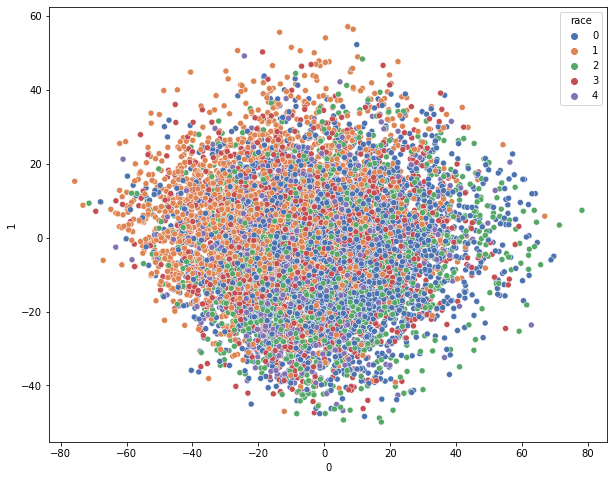

In [86]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(age2_scores[0],age2_scores[1],hue=age2_scores.race,palette="deep")
plt.show()

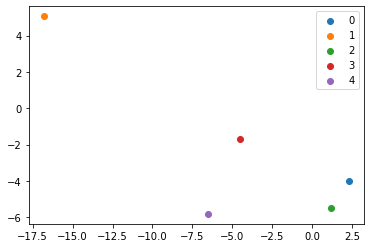

In [88]:
for i in range(0,5):
    [x,y]=[np.mean(age2_scores[age2_scores.race==i][0]),np.mean(age2_scores[age2_scores.race==i][1])]
    plt.scatter(x,y,label=i)
plt.legend();plt.show()

### We apply unsupervised methods 

In [106]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

#### Use the gap-statistic to select K for K-means clustering on the zip data

In [134]:
X=age2
[N, p] = X.shape
minX = list(np.min(X, axis=0)) # data range min
maxX = list(np.max(X, axis=0)) # data range max

clustersNr = 20
list_of_clusters = range(1,clustersNr + 1)
Nsim = 20
Wu = np.zeros((clustersNr, Nsim))
W = np.zeros(clustersNr)
for nrClusters in list_of_clusters: # Want actual number included
    kmeans = KMeans(n_clusters=nrClusters).fit(X)
    C = kmeans.cluster_centers_ # the cluster centers in the p dimensions
    labelCluster = kmeans.labels_ # the labelling for each point
    
    # Compute within-class dissimilarity given X (the data), C (the cluster centers)
    # and gr (the predicted cluster numbers)
    for cluster in range(1, nrClusters + 1):
        Ik = np.where(labelCluster == cluster - 1)[0]
        dk = np.sum((X[Ik, :] - np.multiply(np.ones((np.size(Ik), 1)), C[cluster - 1, :]))**2, axis = 1)  
        Dk = np.sum(dk)
        W[nrClusters-1] += Dk
    
    
    # gap-statistic
    # Nsim simulations of data uniformly distributed over [X]
    for j in range(Nsim):
        # simulate uniformly distributed data
        Xu = np.ones((N,1))*minX + np.random.rand(N,p)*(np.ones((N,1))*maxX-np.ones((N,1))*minX)
        # perform K-means
        kmeansU = KMeans(n_clusters=nrClusters).fit(Xu)
        Cu = kmeansU.cluster_centers_
        labelClusterU = kmeansU.labels_

        # Compute within-class dissmiliarity for the simulated data given Xu (the simulated data),
        # Cu (the cluster centers for the simulated data), and gru (the predicted cluster numbers)
        # for the simulated data).
        for cluster in range(1, nrClusters+1):
            Iku = np.where(labelClusterU == cluster - 1)
            dku = np.sum((Xu[Iku, :] - np.multiply(np.ones((np.size(Iku), 1)), Cu[cluster - 1, :]))**2, axis = 1)  
            Dku = np.sum(dku)
            Wu[nrClusters - 1, j] += Dku
        
# compute expectation of simulated within-class dissimilarities, and the 
# standard errors for the error bars
Elog_Wu = np.mean(np.log(Wu), axis = 1)
sk = np.std(np.log(Wu), axis=1)*np.sqrt(1+1/Nsim) # standard error sk' in (14.39)
x_range = np.array(range(nrClusters)) + 1

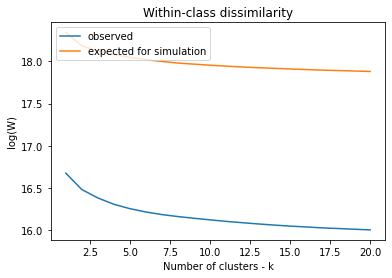

In [135]:
# Plot the log within class scatters
plt.figure()
plt.title("Within-class dissimilarity")
plt.plot(x_range, np.log(W), label='observed')
plt.plot(x_range, Elog_Wu, label='expected for simulation')
plt.legend(loc='upper left')
plt.xlabel("Number of clusters - k")
plt.ylabel("log(W)")
plt.show()

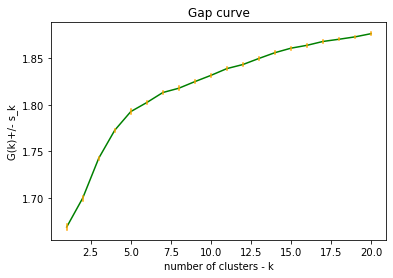

In [136]:
# plot the Gap curve
plt.figure()
plt.title('Gap curve')
Gk =  Elog_Wu.T - np.log(W)
plt.plot(x_range,Gk,color='green')
x_range_list = []
x_range_list.append(x_range)
x_range_list.append(x_range)
GkList = []
GkList.append(Gk-sk)
GkList.append(Gk+sk)
plt.plot(x_range_list, GkList, color='orange')
plt.ylabel('G(k)+/- s_k')
plt.xlabel('number of clusters - k')
plt.show()

In [137]:
# Implementation of the rule for estimating K*, see ESL (14.39), p. 519
K_opt = np.where(np.array(Gk[:-1]) >= np.array(Gk[1:] - sk[1:]))[0]

if not K_opt.size:
    K_opt = clustersNr
    print ("Gap-statistic, optimal K = %d" % K_opt)
else:    
    print ("Gap-statistic, optimal K = %d" % list_of_clusters[K_opt[0]])

Gap-statistic, optimal K = 20


If we increase the number of clusters, it always shows that the optimal one is the highest one added (at least until 20). So not sure if is the optimal way to find the best number of clusters to consider in KNN.

### Elbow method

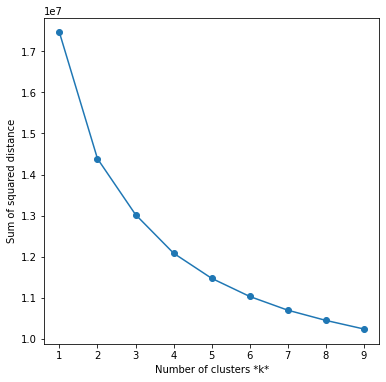

In [138]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(age2)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

### Silhouette Analysis

In [140]:
from sklearn.metrics import silhouette_samples, silhouette_score

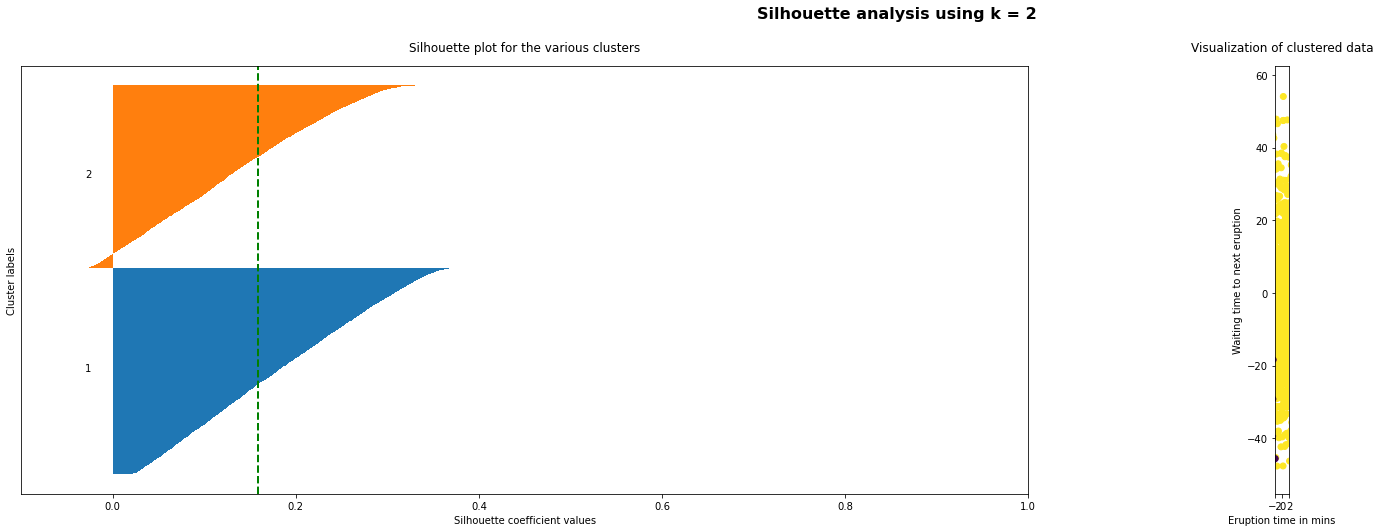

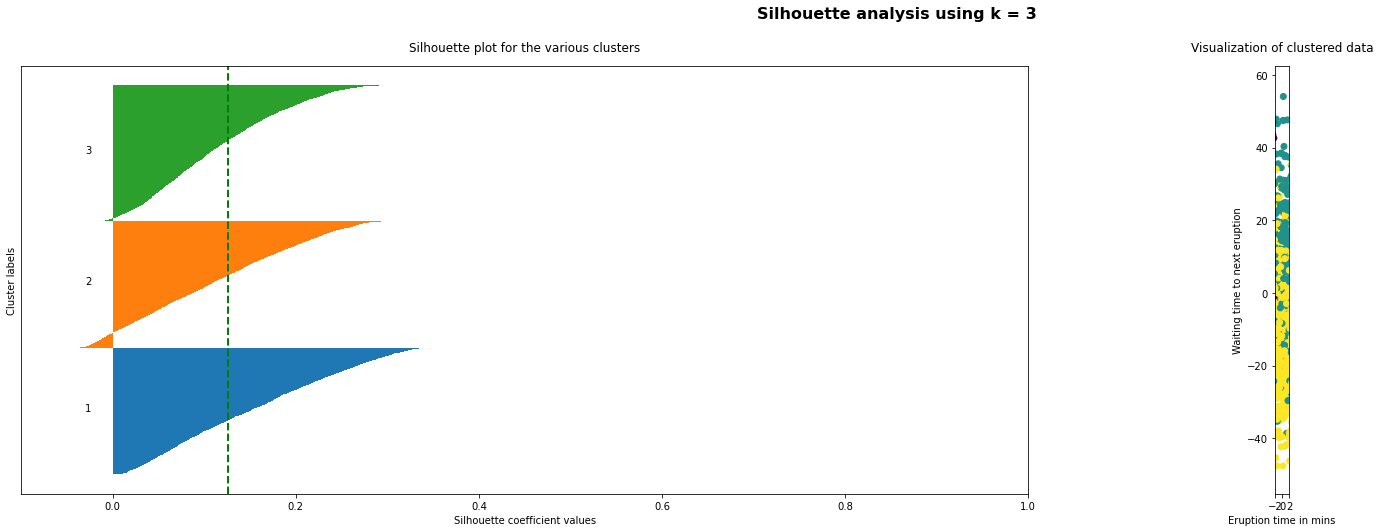

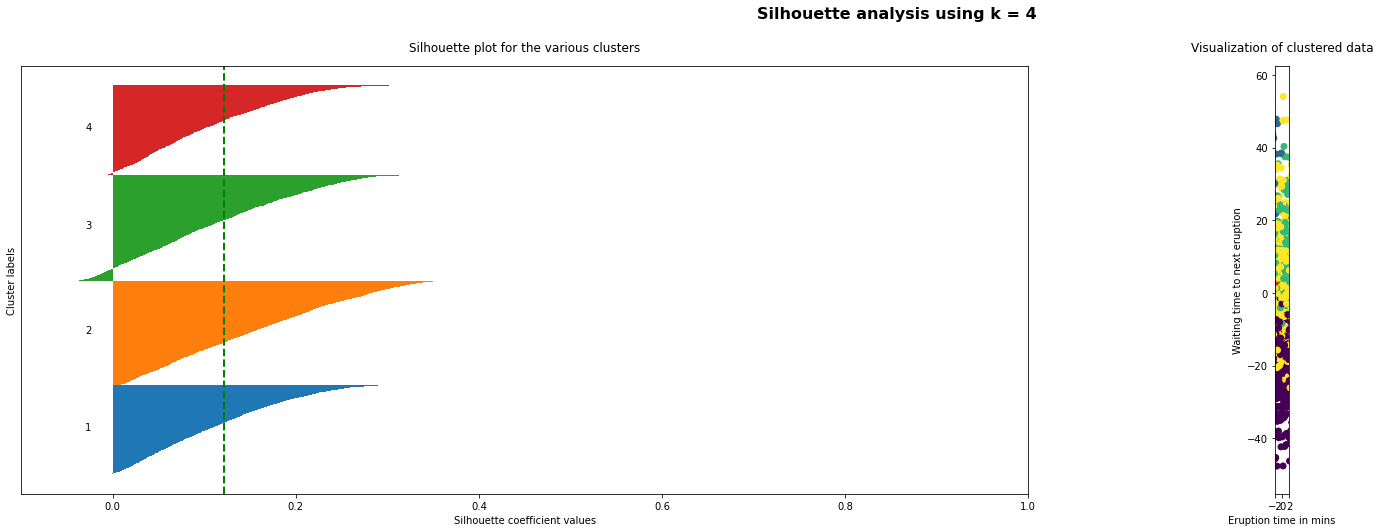

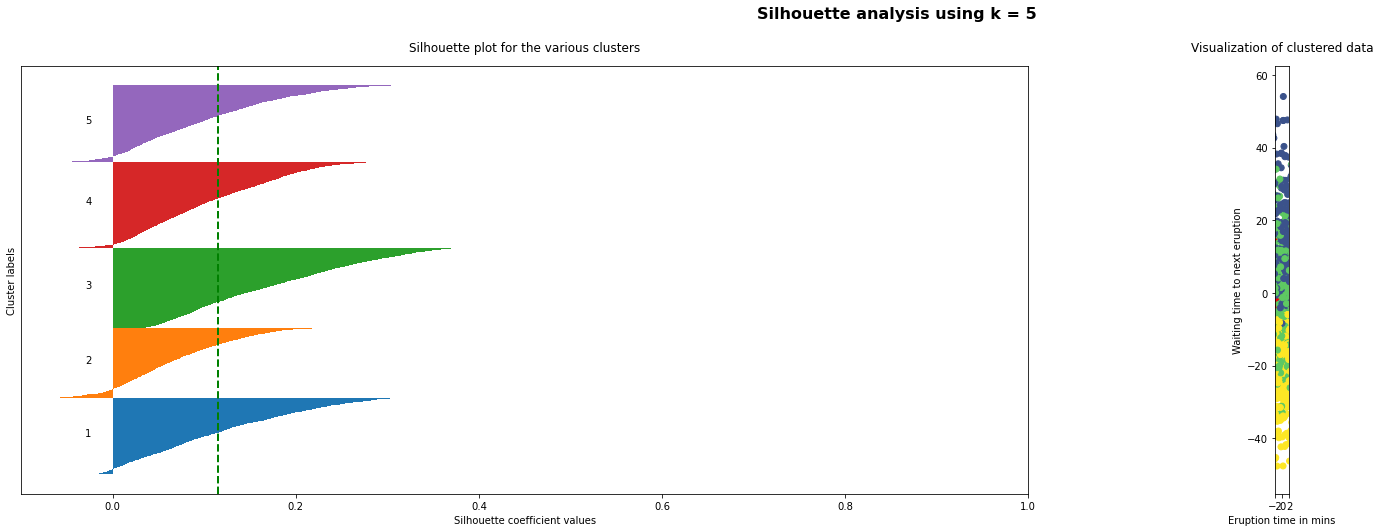

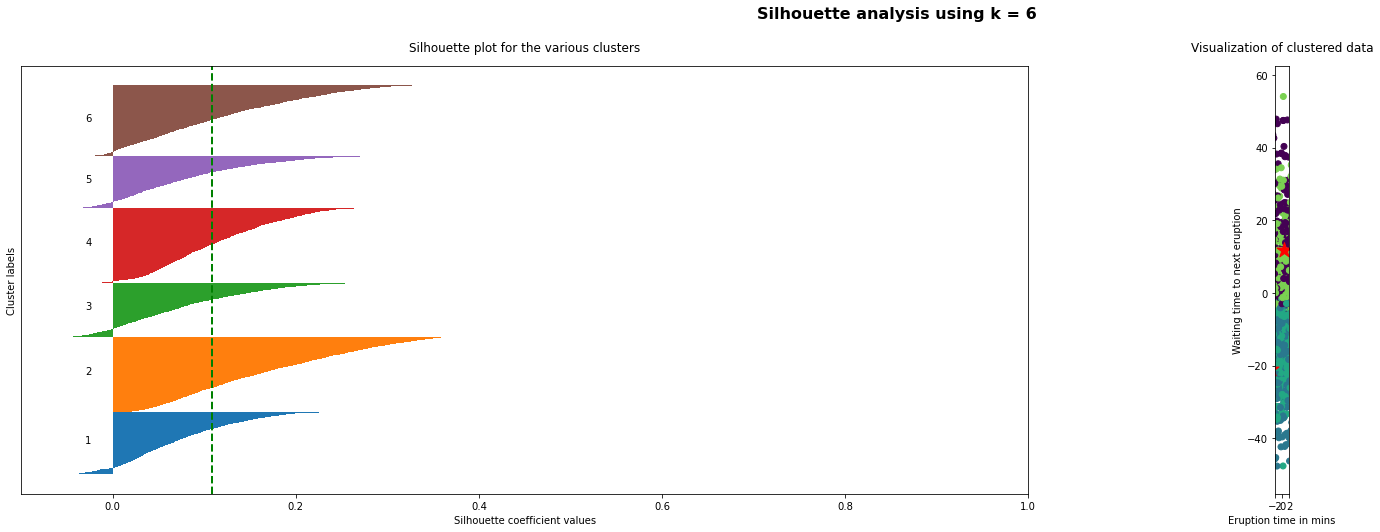

In [142]:
X_std=age2

for i, k in enumerate([2, 3, 4, 5, 6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(25, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

### k-means = 3

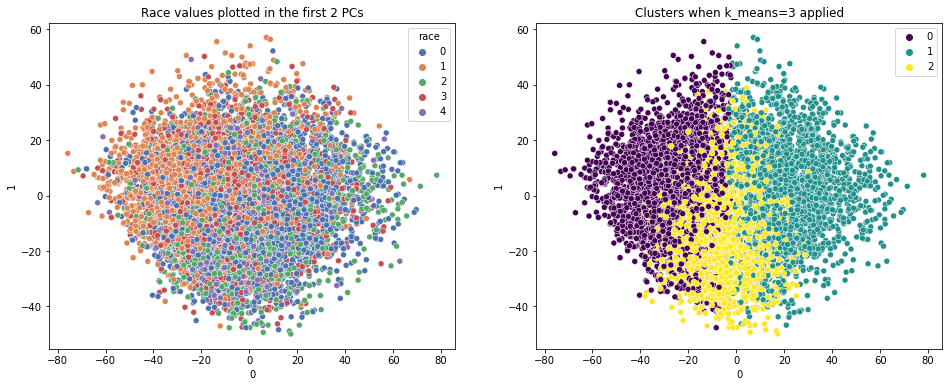

In [193]:
# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(age2)

# Prediction on the subset data
all_predictions = model.predict(age2)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1);sns.scatterplot(age2_scores[0],age2_scores[1],hue=age2_scores.race,palette="deep");
plt.title('Race values plotted in the first 2 PCs')
plt.subplot(1,2,2);sns.scatterplot(age2_scores[0],age2_scores[1],hue=all_predictions,palette="viridis");
plt.title('Clusters when k_means=3 applied');plt.show()

In [192]:
for i in range(0,3):
    counts = Counter(age2_scores.race[all_predictions==i])
    print('CLUSTER ', i)
    for idx,el in enumerate(compute_race_predominance(counts)):
        print('Class ', idx, ': ',el,'%')

CLUSTER  0
Class  0 :  19.8 %
Class  1 :  43.7 %
Class  2 :  10.0 %
Class  3 :  18.7 %
Class  4 :  7.8 %
CLUSTER  1
Class  0 :  39.0 %
Class  1 :  10.6 %
Class  2 :  20.599999999999998 %
Class  3 :  17.4 %
Class  4 :  12.5 %
CLUSTER  2
Class  0 :  39.300000000000004 %
Class  1 :  15.6 %
Class  2 :  19.0 %
Class  3 :  19.2 %
Class  4 :  7.000000000000001 %


In [ ]:
# Count the Number of Occurrences in a Python list using Counter
from collections import Counter

counts = Counter(age2_scores.race[all_predictions==0])
counts

In [191]:
for i in range(0,3):
    counts = Counter(age2_scores.race[all_predictions==i])
    print('CLUSTER ', i)
    for idx,el in enumerate(compute_race_predominance(counts)):
        print('Class ', idx, ': ',el,'%')

CLUSTER  0
Class  0 :  19.8 %
Class  1 :  43.7 %
Class  2 :  10.0 %
Class  3 :  18.7 %
Class  4 :  7.8 %
CLUSTER  1
Class  0 :  39.0 %
Class  1 :  10.6 %
Class  2 :  20.599999999999998 %
Class  3 :  17.4 %
Class  4 :  12.5 %
CLUSTER  2
Class  0 :  39.300000000000004 %
Class  1 :  15.6 %
Class  2 :  19.0 %
Class  3 :  19.2 %
Class  4 :  7.000000000000001 %


In [188]:
def compute_race_predominance(cluster_counts):
    sorted_dict=dict(sorted(cluster_counts.items()))
    percentages = [sorted_dict[el]/sum(sorted_dict.values()) for el in sorted_dict]
    return [np.round(el,3)*100 for el in percentages]

In [189]:
compute_race_predominance(counts)

[19.8, 43.7, 10.0, 18.7, 7.8]

In [156]:
for el in counts:
    print(el)
    print(counts[el])

1
1343
2
308
3
573
4
239
0
608


In [150]:
counts/len(age2_scores)

TypeError: unsupported operand type(s) for /: 'Counter' and 'int'

In [148]:
counts = Counter(age2_scores.race[all_predictions==1])
counts

Counter({0: 1281, 2: 677, 1: 348, 4: 411, 3: 571})

In [149]:
counts = Counter(age2_scores.race[all_predictions==2])
counts

Counter({4: 215, 3: 591, 1: 480, 0: 1213, 2: 585})

### K-means (predefined number of clusters = 5)

In [90]:
# Declaring Model
model = KMeans(n_clusters=5)

# Fitting Model
model.fit(age2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [97]:
# Prediction on the subset data
all_predictions = model.predict(age2)
print(all_predictions)

[0 0 4 ... 0 3 0]


In [99]:
true_values=race[age_groups==2].astype('uint8')
print(true_values)

[4 3 0 ... 3 3 0]


In [100]:
# Compute accuracy
acc=0
for a,b in zip(true_values,all_predictions):
    if a==b:
        acc+=1
print('Final accuracy:', acc/len(true_values))

Final accuracy: 0.2663348512125384


Compute accuracy here has no sense at all.

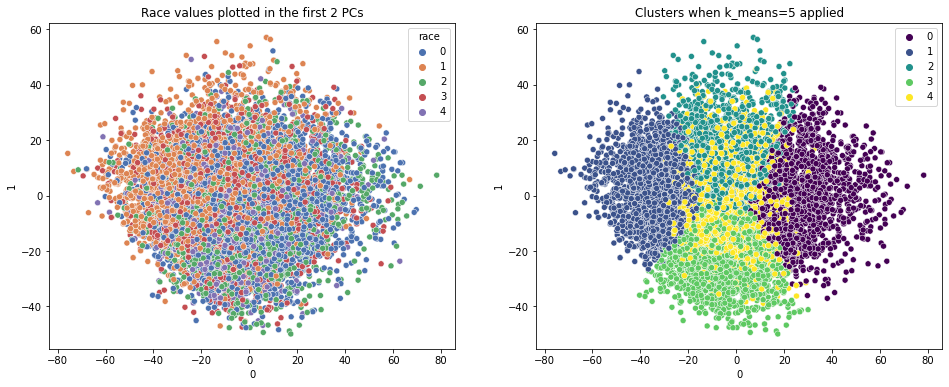

In [122]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1);sns.scatterplot(age2_scores[0],age2_scores[1],hue=age2_scores.race,palette="deep");
plt.title('Race values plotted in the first 2 PCs')
plt.subplot(1,2,2);sns.scatterplot(age2_scores[0],age2_scores[1],hue=all_predictions,palette="viridis");
plt.title('Clusters when k_means=5 applied');plt.show()

In [116]:
# Count the Number of Occurrences in a Python list using Counter
from collections import Counter

counts = Counter(age2_scores.race[all_predictions==0])
counts

Counter({4: 128, 3: 342, 0: 825, 2: 404, 1: 169})

In [117]:
counts = Counter(age2_scores.race[all_predictions==1])
counts

Counter({1: 937, 2: 187, 3: 332, 4: 150, 0: 348})

In [118]:
counts = Counter(age2_scores.race[all_predictions==2])
counts

Counter({1: 640, 0: 410, 2: 166, 3: 348, 4: 118})

In [119]:
counts = Counter(age2_scores.race[all_predictions==3])
counts

Counter({0: 671, 4: 229, 3: 347, 2: 367, 1: 232})

In [120]:
counts = Counter(age2_scores.race[all_predictions==4])
counts

Counter({0: 848, 2: 446, 1: 193, 3: 366, 4: 240})

In [111]:
age2_scores[0]

0       21.243497
1       23.590310
2        5.392888
3      -59.773865
4       -4.107576
          ...    
9438    -5.885127
9439    -5.329966
9440    16.130735
9441     2.198586
9442    33.800039
Name: 0, Length: 9443, dtype: float64

### TSNE clustering

In [ ]:
# Prediction on the subset data
all_predictions = model.predict(age2)
print(all_predictions)

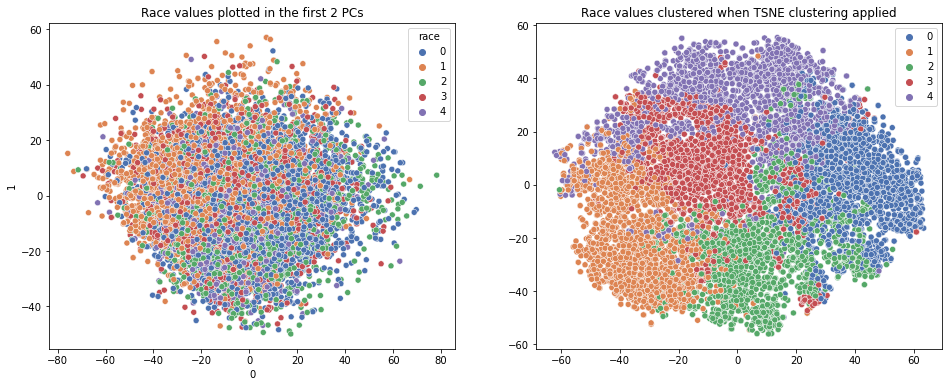

In [110]:
# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(age2)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]


plt.figure(figsize=(16,6))
plt.subplot(1,2,1);sns.scatterplot(age2_scores[0],age2_scores[1],hue=age2_scores.race,palette="deep");
plt.title('Race values plotted in the first 2 PCs')
plt.subplot(1,2,2);sns.scatterplot(x_axis,y_axis,hue=all_predictions,palette="deep")
plt.title('Race values clustered when TSNE clustering applied');plt.show()

In [16]:
Scores['race']=race[0:5000].astype('uint8')

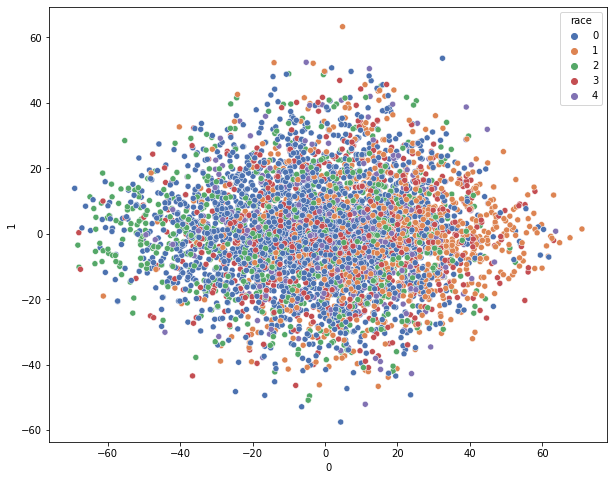

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(Scores[0],Scores[1],hue=Scores.race,palette="deep")
plt.show()

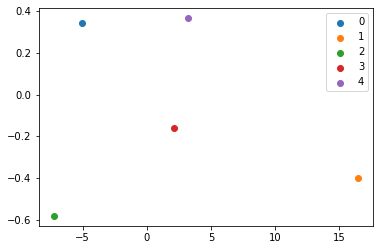

In [18]:
for i in range(0,5):
    [x,y]=[np.mean(Scores[Scores.race==i][0]),np.mean(Scores[Scores.race==i][1])]
    plt.scatter(x,y,label=i)
plt.legend();plt.show()

In [19]:
np.sum(pca.explained_variance_ratio_)

0.9238851160630199

In [20]:
for idx in range(0,5):
    print(len(labels[0:5000][labels[0:5000].race==idx]))

1854
671
1031
848
596


## Apply unsupervised learning

In [21]:
from sklearn.cluster import KMeans

In [22]:
# Declaring Model
model = KMeans(n_clusters=5)

# Fitting Model
model.fit(pca_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# Prediction on the entire data
all_predictions = model.predict(pca_scores)
print(all_predictions)

[3 0 2 ... 1 4 3]


In [24]:
pca_scores

array([[-20.99421387, -18.31442512,   0.39482413, ...,   0.05635444,
          0.9406068 ,  -0.44343469],
       [ 12.49078487, -13.54686235, -29.4895032 , ...,   0.48195858,
          0.89187965,  -0.09511397],
       [  7.46273554,  16.74005236,  -2.05195348, ...,   0.36598242,
         -0.62376094,  -0.35180058],
       ...,
       [ 29.8643727 ,   7.19742857,  -8.49455929, ...,   0.51714497,
         -0.08952739,   0.58858825],
       [-37.74356327,   4.37135847,   7.47962503, ...,  -0.37644109,
         -0.09133624,  -0.2917861 ],
       [ -9.01966926, -17.17022502,  22.67712584, ...,  -0.3687033 ,
          1.33726441,  -0.73017739]])

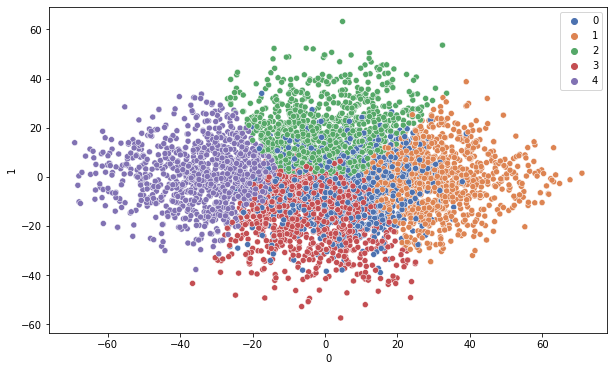

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(Scores[0],Scores[1],hue=all_predictions,palette="deep");plt.show()

### TSNE clustering

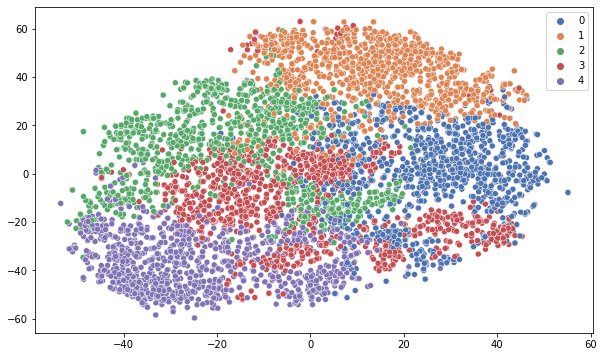

In [26]:
from sklearn.manifold import TSNE

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(pca_scores)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x_axis,y_axis,hue=all_predictions,palette="deep");plt.show()

### DBSCAN

In [27]:
dbscan.labels_

NameError: name 'dbscan' is not defined

In [ ]:
from sklearn.cluster import DBSCAN

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(X_non_mean[0:5000])

# Transoring Using PCA
pca = PCA(n_components=2).fit(X_non_mean[0:5000])
pca_2d = pca.transform(X_non_mean[0:5000])

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()